In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import open3d as o3d


In [24]:
# point cloud 파일이 들어있는 폴더 경로
pc_folder = "/media/rtlink/JetsonSSD-256/socap_dataset/pc/"

# imu 파일이 들어있는 폴더 경로
imu_folder = "/media/rtlink/JetsonSSD-256/socap_dataset/imu/"

In [25]:
# Surface Roughness, angular_velocity, linear_acceleration 값을 저장할 리스트 생성
roughness_list = []


In [26]:
# 포인트 클라우드 파일 순서대로 처리
for i, file in enumerate(sorted(os.listdir(pc_folder))):
    # point cloud 파일 읽기
    pcd_file = os.path.join(pc_folder, file)
    pcd = o3d.io.read_point_cloud(pcd_file)

    # Normal 벡터 추정
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.03, max_nn=30))

    # Moment of Inertia 계산
    cov = np.cov(np.asarray(pcd.points).T)
    evals, evecs = np.linalg.eigh(cov)
    radii = np.sqrt(evals)

    # Surface Roughness 계산
    center = np.asarray(pcd.get_center())
    roughness = 0
    for i in range(len(pcd.points)):
        point = np.asarray(pcd.points[i])
        vec = point - center
        dist = np.linalg.norm(np.dot(vec, evecs) / radii)
        roughness += dist
    roughness /= len(pcd.points)
    roughness_list.append(roughness)

In [35]:

angular_velocity_list = []
linear_acceleration_list = []

for i, file in enumerate(sorted(os.listdir(imu_folder))):
    # imu 파일 읽기
    imu_file = os.path.join(imu_folder, file)
    # print(imu_file)
    imu_data = pd.read_csv(imu_file)

    # angular_velocity 평균 계산
    angular_velocity_mean = imu_data[["angular_velocity_x", "angular_velocity_y", "angular_velocity_z"]].values
    angular_velocity_list.append(np.mean(angular_velocity_mean))
    # angular_velocity_list.append(angular_velocity_mean)
    # print(angular_velocity_list)

    # linear_acceleration 평균 계산
    linear_acceleration_mean = imu_data[["linear_acceleration_x", "linear_acceleration_y", "linear_acceleration_z"]].values
    # linear_acceleration_list.append(linear_acceleration_mean)
    linear_acceleration_list.append(np.mean(linear_acceleration_mean))
print(angular_velocity_list)
print(linear_acceleration_list)

[0.07128383333333334, -0.04039139666666667, -0.00803386, 0.04376475333333333, 0.014824933333333332, 0.042921299999999996, -0.027252866666666667, 0.0004438433333333332, 0.013981616666666667, 0.01957424, 0.0011540366666666667, 0.014736166666666667, -0.008522116666666668, 0.03222436666666667, -0.03772805, -0.035997133333333334, -0.014913699999999997, -0.013271429999999999, 0.005104400000000001, 0.0428325, 0.009454208666666667, 0.00288509, 0.005148776, -0.011451600000000001, 0.013981606666666667, -0.04110146666666666, 0.004971226666666666, -0.033911036666666665, -0.011140866666666667, 0.013271433333333334, 0.15623873333333335, 0.04172285666666667, -0.040879576666666674, 0.018420100000000005, -0.0008877333333333348, -0.007012999999999999, -0.009276666666666667, 0.00621403, -0.011629166666666668, -0.004882459999999999, 0.015978970000000002, -0.04079073333333333, -0.018020733333333334, 0.00013316666666666568, 0.02223736666666667, -0.015934563333333335, 0.034754266666666665, 0.0658687666666666

In [36]:
print(angular_velocity_list)

[0.07128383333333334, -0.04039139666666667, -0.00803386, 0.04376475333333333, 0.014824933333333332, 0.042921299999999996, -0.027252866666666667, 0.0004438433333333332, 0.013981616666666667, 0.01957424, 0.0011540366666666667, 0.014736166666666667, -0.008522116666666668, 0.03222436666666667, -0.03772805, -0.035997133333333334, -0.014913699999999997, -0.013271429999999999, 0.005104400000000001, 0.0428325, 0.009454208666666667, 0.00288509, 0.005148776, -0.011451600000000001, 0.013981606666666667, -0.04110146666666666, 0.004971226666666666, -0.033911036666666665, -0.011140866666666667, 0.013271433333333334, 0.15623873333333335, 0.04172285666666667, -0.040879576666666674, 0.018420100000000005, -0.0008877333333333348, -0.007012999999999999, -0.009276666666666667, 0.00621403, -0.011629166666666668, -0.004882459999999999, 0.015978970000000002, -0.04079073333333333, -0.018020733333333334, 0.00013316666666666568, 0.02223736666666667, -0.015934563333333335, 0.034754266666666665, 0.0658687666666666

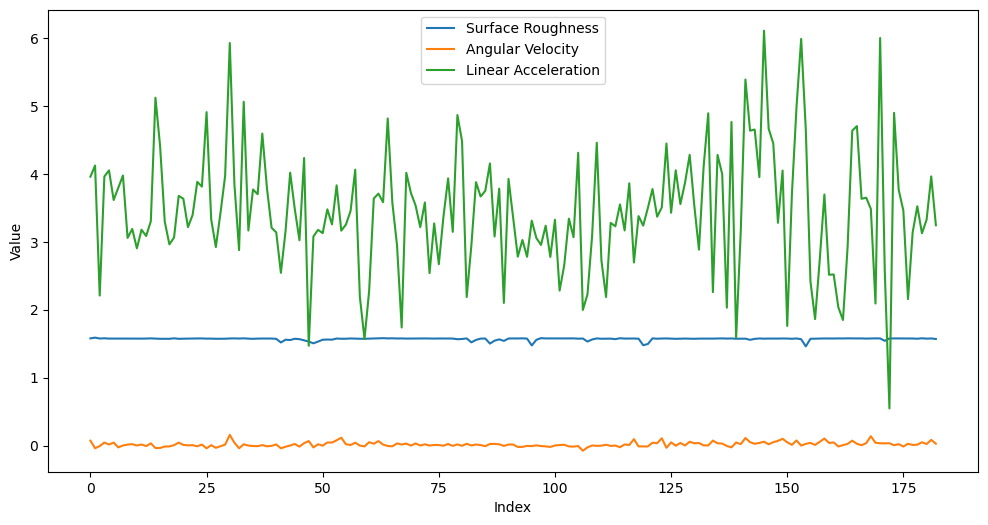

In [37]:
# Surface Roughness, angular_velocity, linear_acceleration 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(roughness_list, label="Surface Roughness")
ax.plot(angular_velocity_list, label="Angular Velocity")
ax.plot(linear_acceleration_list, label="Linear Acceleration")

ax.set_xlabel("Index")
ax.set_ylabel("Value")

ax.legend()
plt.show()

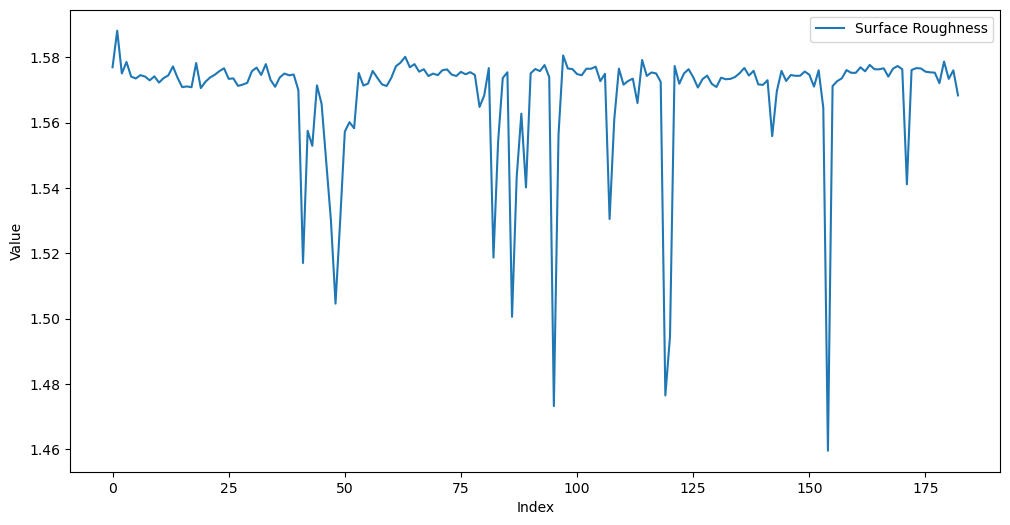

In [41]:
# Surface Roughness, angular_velocity, linear_acceleration 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# ax.plot(roughness_list, label="Surface Roughness")
ax.plot(angular_velocity_list, label="Angular Velocity")
# ax.plot(linear_acceleration_list, label="Linear Acceleration")

ax.set_xlabel("Index")
ax.set_ylabel("Value")

ax.legend()
plt.show()

NameError: name 'df' is not defined

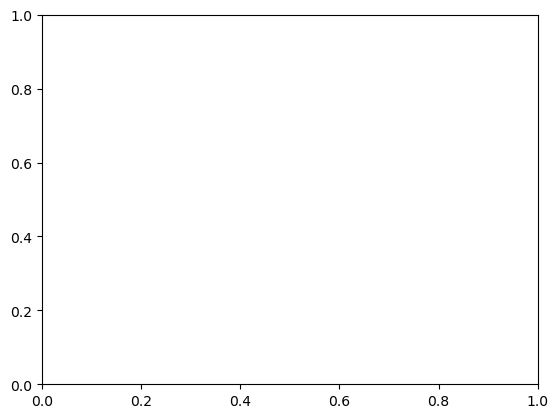

In [40]:
# 그래프 그리기
fig, ax = plt.subplots()

# 데이터프레임에서 열의 최대 및 최소값 계산하기
roughness_max = df['surface roughness'].max()
roughness_min = df['surface roughness'].min()
angular_velocity_max = df['angular_velocity'].max()
angular_velocity_min = df['angular_velocity'].min()
linear_acceleration_max = df['linear_acceleration'].max()
linear_acceleration_min = df['linear_acceleration'].min()

# y축 범위 설정하기
ax.set_ylim([min(roughness_min, angular_velocity_min, linear_acceleration_min), max(roughness_max, angular_velocity_max, linear_acceleration_max)])

# 그래프 그리기
ax.plot(ax=ax)

# 결과 출력
plt.show()